**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
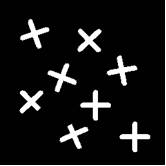
art8lab1.png: 
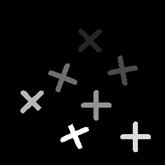
art8lab2.png: 
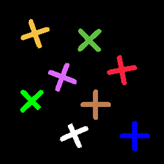
		

True

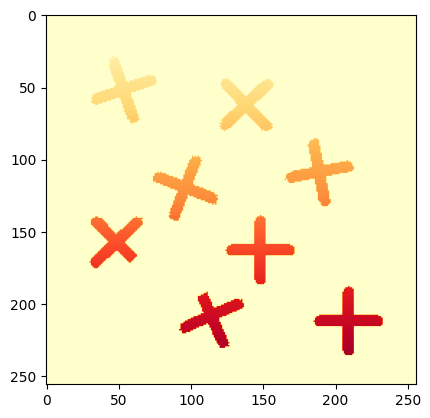

In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from queue import LifoQueue


img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)
imgH = img.shape[0];
imgW = img.shape[1];
imgRot = np.zeros((imgH,imgW))
# as cores da imagem original são somente 1 e 255
# image size 256x256
vizinhanca = 4
label = 1
lista_proximos = LifoQueue()

p = {"x":0, "y":0}
p_atual = {"x":0, "y":0}

for i in range(0,imgH):
    for j in range(0, imgW):
        p["x"] = i
        p["y"] = j

        if(img[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
            imgRot[p["x"],p["y"]] = label
            lista_proximos.put(p)

            while not lista_proximos.empty():
                p_atual = lista_proximos.get()

                #ponto acima
                p["x"] = p_atual["x"] - 1
                p["y"] = p_atual["y"]

                if (img[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)

                #ponto abaixo
                p["x"] = p_atual["x"] + 1
                p["y"] = p_atual["y"]

                if (img[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)
                    
                #ponto à esquerda
                p["x"] = p_atual["x"]
                p["y"] = p_atual["y"] - 1

                if (img[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)
                
                #ponto à direita 
                p["x"] = p_atual["x"]
                p["y"] = p_atual["y"] + 1

                if (img[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)

                #se for vizinhança 8
                if(vizinhanca == 8):

                    #ponto à noroeste 
                    p["x"] = p_atual["x"] - 1
                    p["y"] = p_atual["y"] - 1

                    if (img[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                        imgRot[p["x"],p["y"]] = label
                        lista_proximos.put(p)

                    #ponto à nordeste 
                    p["x"] = p_atual["x"] - 1
                    p["y"] = p_atual["y"] + 1

                    if (img[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                        imgRot[p["x"],p["y"]] = label
                        lista_proximos.put(p)
                        
                    #ponto à sudoeste    
                    p["x"] = p_atual["x"] + 1
                    p["y"] = p_atual["y"] - 1

                    if (img[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                        imgRot[p["x"],p["y"]] = label
                        lista_proximos.put(p)

                    #ponto à sudeste    
                    p["x"] = p_atual["x"] + 1
                    p["y"] = p_atual["y"] + 1

                    if (img[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                        imgRot[p["x"],p["y"]] = label
                        lista_proximos.put(p)

    label = label + 1

# plt.imshow(imgRot, cmap='gray', vmin=0, vmax=255)
plt.imshow(imgRot, cmap='YlOrRd', vmin=0, vmax=255)
cv2.imwrite("art8Out.png", imgRot)

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

Componentes conexos =  261


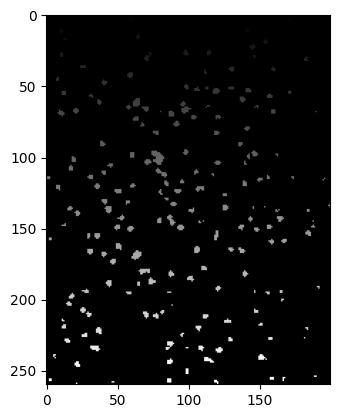

In [76]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from queue import LifoQueue

img = cv2.imread("clc3.png", cv2.IMREAD_GRAYSCALE)

imgH = img.shape[0]
imgW = img.shape[1]

imgThr = np.zeros((imgH, imgW))
imgRot = np.zeros((imgH, imgW))

label = 1

lista_proximos = LifoQueue()

p = {"x":0, "y":0}
p_atual = {"x":0, "y":0}

#Binarizando a imagem
for i in range(0, imgH):
    for j in range(0, imgW):
        if(img[i,j] <= 162):
            imgThr[i,j] = 255
        else:
            imgThr[i,j] = 0

#Componentes conexos
for i in range(0,imgH):
    for j in range(0, imgW):
        p["x"] = i
        p["y"] = j

        if(imgThr[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
            imgRot[p["x"],p["y"]] = label
            lista_proximos.put(p)

            while not lista_proximos.empty():
                p_atual = lista_proximos.get()

                #ponto acima
                p["x"] = p_atual["x"] - 1
                p["y"] = p_atual["y"]

                if (imgThr[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)

                #ponto abaixo
                p["x"] = p_atual["x"] + 1
                p["y"] = p_atual["y"]

                if (imgThr[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)
                    
                #ponto à esquerda
                p["x"] = p_atual["x"]
                p["y"] = p_atual["y"] - 1

                if (imgThr[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)
                
                #ponto à direita 
                p["x"] = p_atual["x"]
                p["y"] = p_atual["y"] + 1

                if (imgThr[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)

                #ponto à noroeste 
                p["x"] = p_atual["x"] - 1
                p["y"] = p_atual["y"] - 1

                if (imgThr[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)

                #ponto à nordeste 
                p["x"] = p_atual["x"] - 1
                p["y"] = p_atual["y"] + 1

                if (imgThr[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)
                    
                #ponto à sudoeste    
                p["x"] = p_atual["x"] + 1
                p["y"] = p_atual["y"] - 1

                if (imgThr[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)

                #ponto à sudeste    
                p["x"] = p_atual["x"] + 1
                p["y"] = p_atual["y"] + 1

                if (imgThr[p["x"],p["y"]] == 255) and (imgRot[p["x"],p["y"]] == 0):
                    imgRot[p["x"],p["y"]] = label
                    lista_proximos.put(p)

    label = label + 1

print("Componentes conexos = ", label)
plt.imshow(imgRot, cmap='gray', vmin=0, vmax=255)

In [50]:
from queue import LifoQueue

stack = LifoQueue()

stack.put('a')
stack.put('b')
stack.put('c')

print(stack.get())
print(stack.get())
print(stack.get())

stack.empty()

c
b
a


True